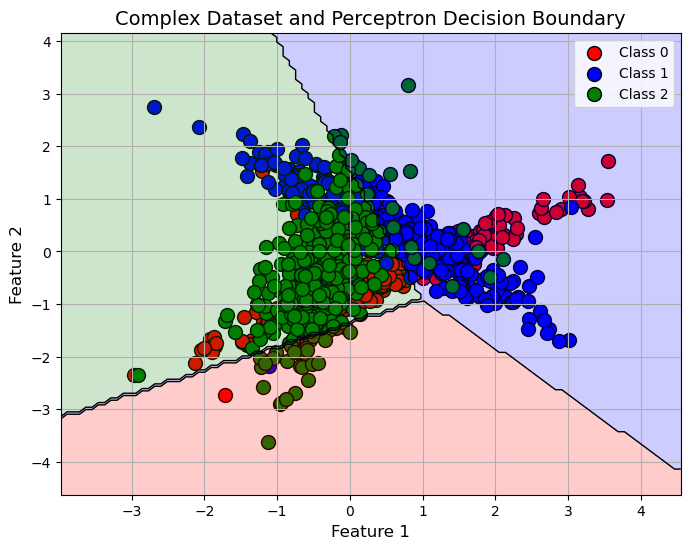

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split

# Generate a more complex dataset
X, y = make_classification(
    n_samples=300, 
    n_features=2, 
    n_classes=3, 
    n_informative=2, 
    n_redundant=0, 
    n_clusters_per_class=1,  # Increase the number of clusters per class
    class_sep=0.5,           # Reduce separation between classes
    flip_y=0.1,              # Add some label noise
    random_state=42
)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Perceptron
model = Perceptron()
model.fit(X_train, y_train)

# Plot the data
def plot_data(X, y, model=None):
    plt.figure(figsize=(8, 6))

    # Define colors for 3 classes
    colors = ['red', 'blue', 'green']
    
    # Plot the data points with different colors for each class
    for i in range(3):  # Loop over the 3 classes
        plt.scatter(X[y == i, 0], X[y == i, 1], color=colors[i], label=f"Class {i}", edgecolor='k', s=100)

    # Plot decision boundary if a model is provided
    if model:
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, alpha=0.2, colors=colors, levels=np.arange(-0.5, 3, 1))
        plt.contour(xx, yy, Z, levels=np.arange(-0.5, 3, 1), colors='black', linewidths=1)

    plt.title("Complex Dataset and Perceptron Decision Boundary", fontsize=14)
    plt.xlabel("Feature 1", fontsize=12)
    plt.ylabel("Feature 2", fontsize=12)
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot the data and decision boundary
plot_data(X, y, model)
